# Using data analysis to predict Student Success at school

## Business Understanding

### Research question

Which **factors** impact **student’s outcomes** the most?

### Project Description

For this project, we focus on **inference**, which means we want to understand the **relationships between features and the target variable**.

Here, we want to show which **factors** are the most important in the **success of a student**. We have data about the **involvement of students** in their studies but also about  the **involvement of their family**. Other 
information about the **habits** and **resources** of students are also important to sketch their **daily environment**.

### Expected results

Before doing any analysis, we expect to see that the factors which **contribute the most to the academic success of a student**
are the ones related to the **lifestyle** of the person. More specifically, we think that :
- The **number of hours studied** will impact the result because we expect that the more you study a
subject, the more you can learn and then succeed during the exam.
- **Sleep hours** is an important attribute because it gives us information on the physical condition of
the student.
- The **motivation level** should show how much the student wants to succeed and thus makes bigger
efforts to complete a task.

## Initial steps : Importing of the libraries and loading of the dataset

### Importing required libraries 

In this section, we import the necessary libraries for the project.

In [12]:
#pip install seaborn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

from scipy.stats import chi2_contingency

### Loading the Dataset 

We use 'pandas' library to load the dataset.

In [16]:
data = pd.read_csv('StudentPerformanceFactors.csv')

Now that this basic steps are done, we can start **data cleaning**.

## Data Preparation and Cleaning

The purposes of this section are:
- To have a **better understanding** of our data, in order to make an informed analysis
- To prepare/clean our data to have **good quality** and **ready-to-use data**.

### Previewing the Dataset



We use `data.head()` to preview the first 15 rows of the dataset and get an **overview of the data structure**.


In [22]:
data.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


We complete this overview using `data.info()` to see the different **data types**.

In [24]:
data.info() #details on the student dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Checking for missing values

To make sure our data is usable, we check for **missing values**.

In [27]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Calculating missing data percentages
We calculate the percentage of missing values for each column to better understand the extent of missing data.


In [29]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_values_percentage.apply(lambda x: f"{x:.2f}%"))

Hours_Studied                 0.00%
Attendance                    0.00%
Parental_Involvement          0.00%
Access_to_Resources           0.00%
Extracurricular_Activities    0.00%
Sleep_Hours                   0.00%
Previous_Scores               0.00%
Motivation_Level              0.00%
Internet_Access               0.00%
Tutoring_Sessions             0.00%
Family_Income                 0.00%
Teacher_Quality               1.18%
School_Type                   0.00%
Peer_Influence                0.00%
Physical_Activity             0.00%
Learning_Disabilities         0.00%
Parental_Education_Level      1.36%
Distance_from_Home            1.01%
Gender                        0.00%
Exam_Score                    0.00%
dtype: object


### Dropping missing values
Since the percentage of missing values is relatively small (around 1-2%), we decide to **drop the rows with missing data** using `data.dropna()`.

In [31]:
data.dropna(inplace=True)

After dropping the rows, we check again to ensure there are no missing values left in the dataset.

In [33]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### Encoding categorical data

First, we transform the **Objects Values** into **Categorical Values**. 

The conversion of object-type variables (such as school type, gender) to categorical is done to better reflect their discrete nature and to facilitate their analysis in the study of factors explaining educational outcomes.

In [36]:
categorical_columns = data.select_dtypes(include = ['object']).columns

# transform objects into categorical values
for col in categorical_columns:
    data[col] = data[col].astype('category')

Then, we verify that the data type has been correctly changed

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   int64   
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   int64   
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

## Exploratory Data Analysis (EDA)

Now we want to have better insights of our data, especially about the relationships between different features. For this, we use different kinds of **graphic representations** for data visualization. 

Let's plot **all variables** with the **exam_score** to see some first relationships between them.

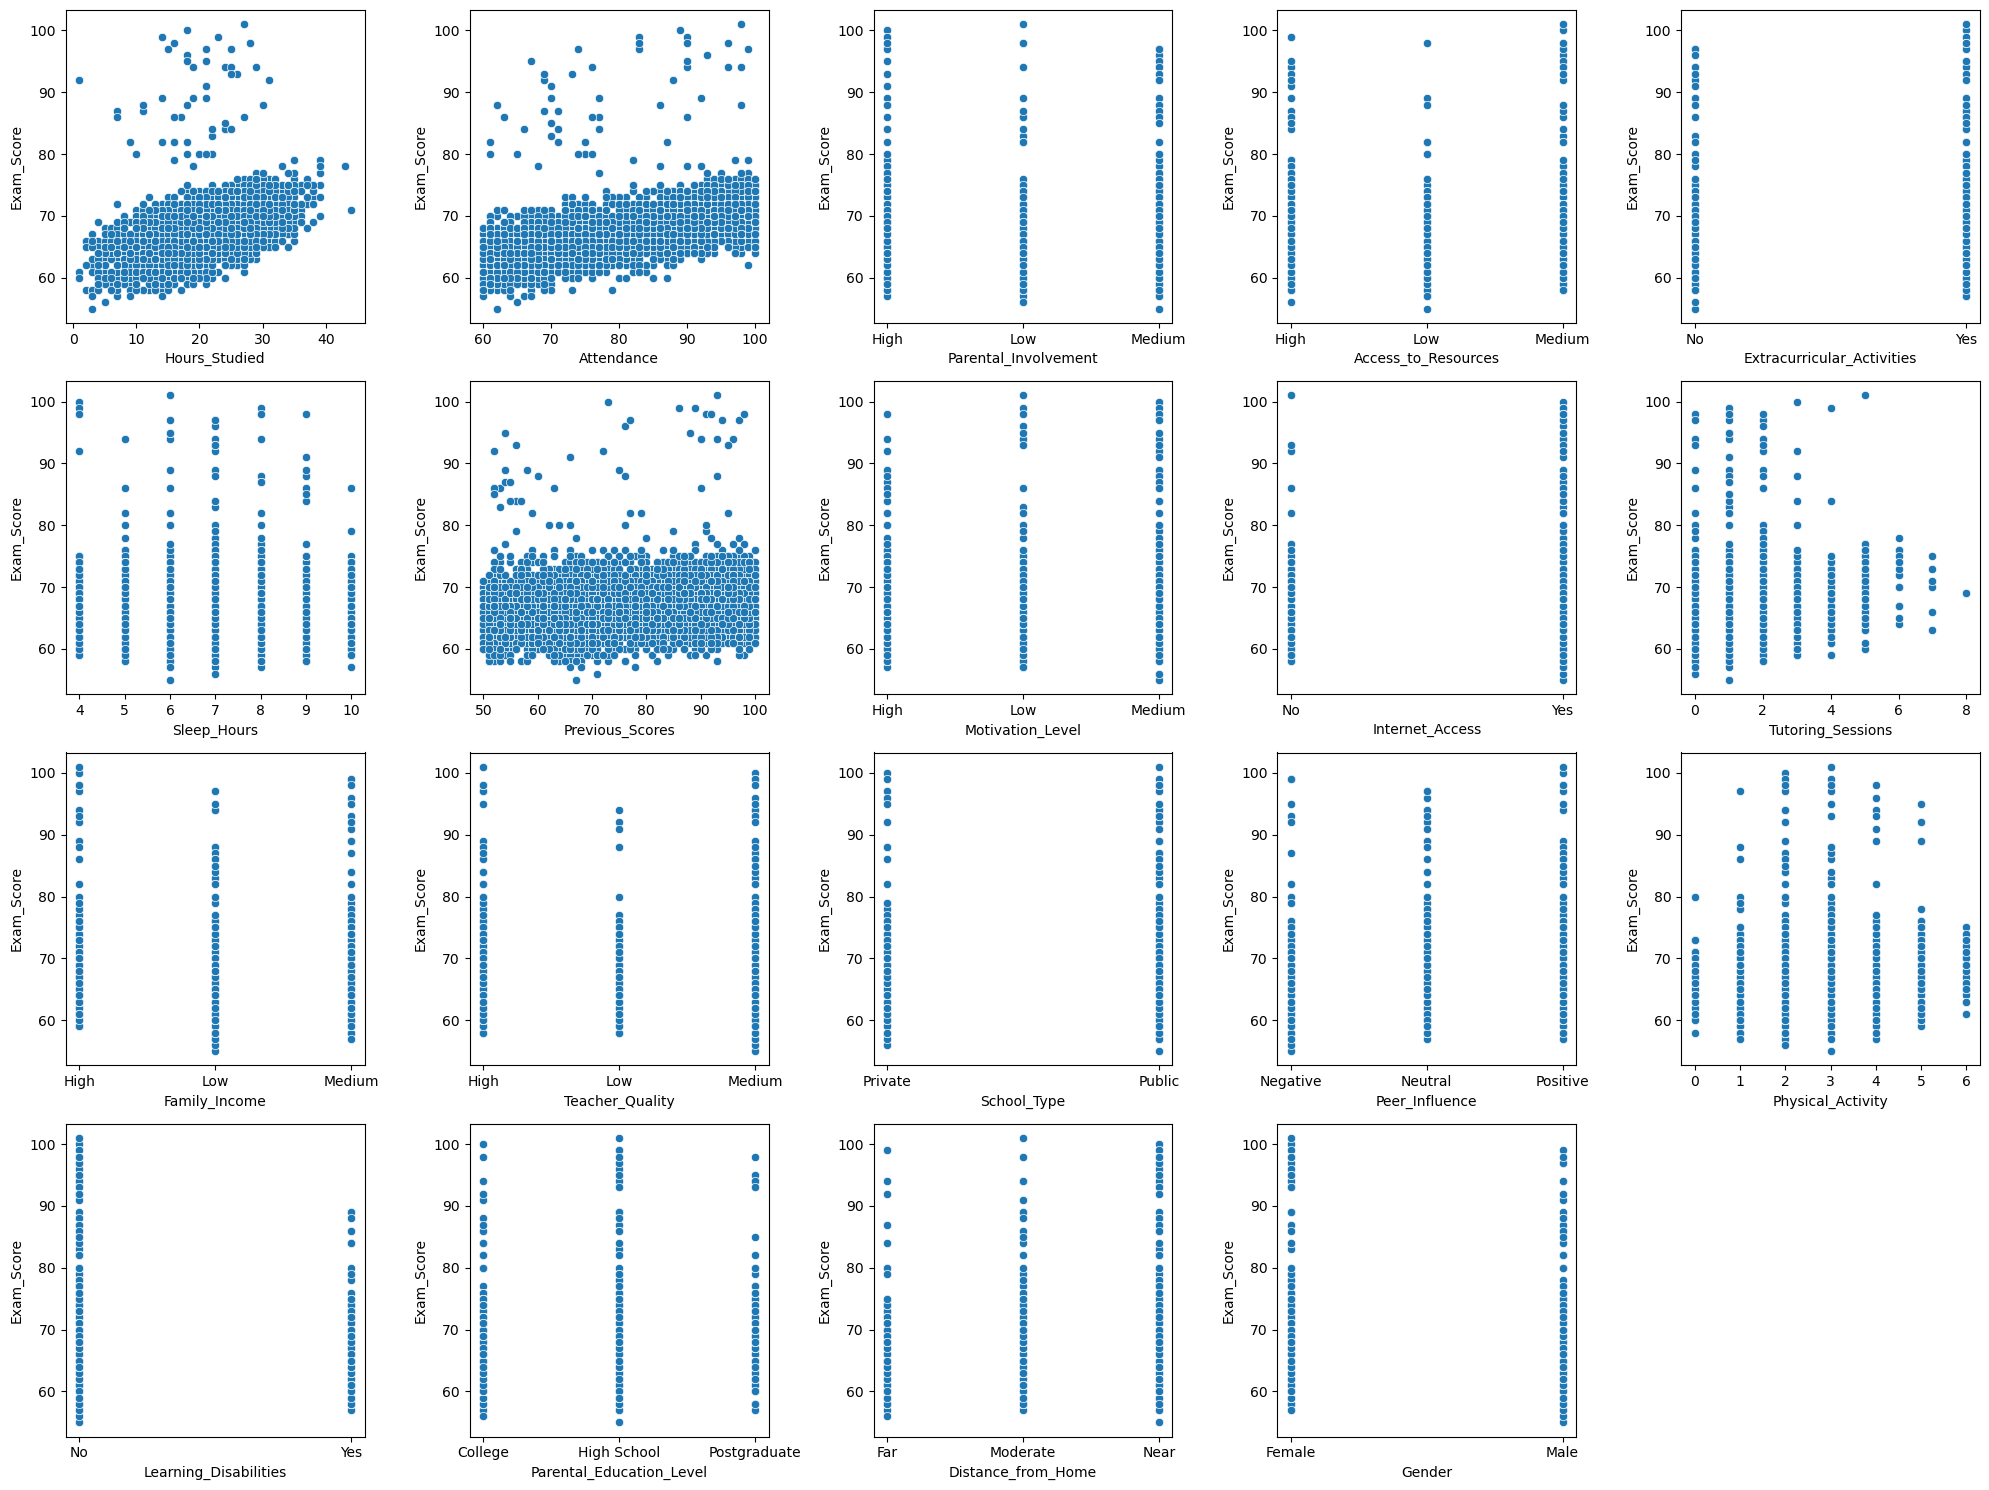

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 19:
        ax = plt.subplot(4, 5, plotnumber)
        sns.scatterplot(x = data[column] , y = data['Exam_Score'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### First Interesting points
- **Clear linear link** :
    + Hours_studied,
    + Attendance
- **Clear link** :
    + Tutoring_Sessions,
    + Sleep_Hours,
    + Physical_Activity,
    + Distance_from_Home
- **Noticable link** :
    + Parental_Education_Level, 

We want to see if our features have some correlation between themselves. As a lot of it is categorical, we will use the **Chi-square** test and the **Cramers' V** test.

The Chi-square test is a statistical test that helps decide if there is a significant association between two categorical variables or not. The treshold value is set up to 0.05 :
- If the score between two variables is **higher than 0.05**, the two variables are **not correlated**.
- If the score between two variables is **lower than 0.05**, the two variables are **correlated**.

C:\Users\aguib\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\aguib\AppData\Local\Temp\ipykernel_14708\835534941.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True,


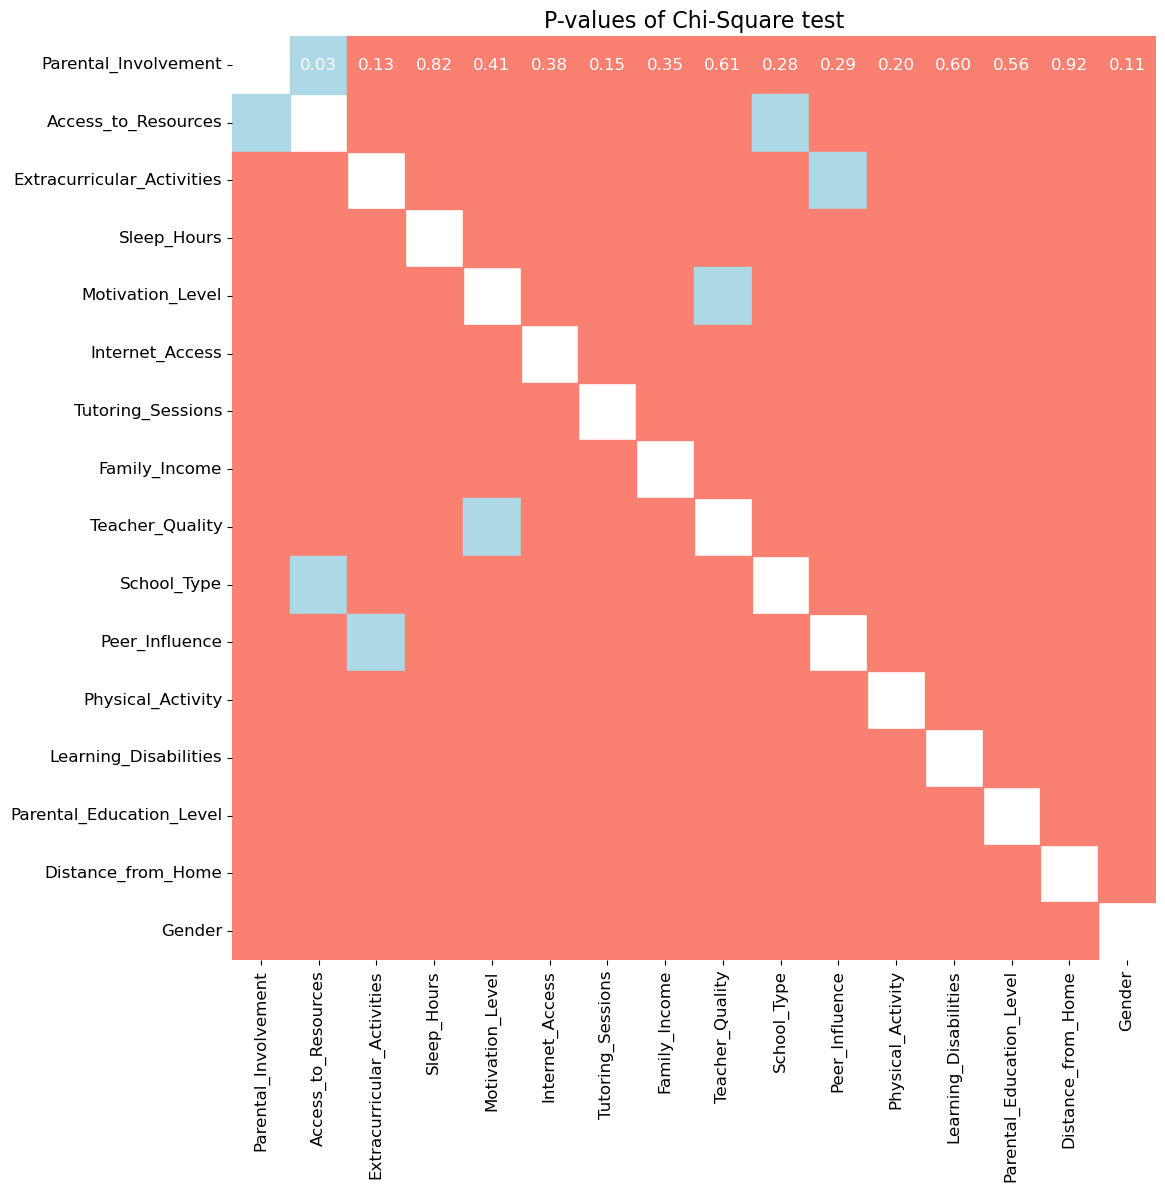

In [45]:
data_cat = data.drop(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score'], axis=1)

def chi_square_test(data_cat):
    cols = data_cat.columns
    p_values = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                contingency_table = pd.crosstab(data_cat[col1], data_cat[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                p_values.loc[col1, col2] = p
            else:
                p_values.loc[col1, col2] = np.nan

    return p_values

p_values = chi_square_test(data_cat)

def custom_cmap(value):
    return 'lightblue' if value <= 0.05 else 'salmon'

colors = p_values.map(lambda x: custom_cmap(x) if not np.isnan(x) else 'white')

plt.figure(figsize=(16, 12))

sns.heatmap(p_values, annot=True, fmt=".2f", cbar=False, square=True,
            annot_kws={"size": 12, "color": "white"},
            mask=p_values.isnull(), linewidths=0.5,
            cmap=sns.color_palette(['lightblue', 'salmon']))

for y in range(p_values.shape[0]):
    for x in range(p_values.shape[1]):
        if not np.isnan(p_values.iloc[y, x]):
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True,
                                              color=colors.iloc[y, x], edgecolor='black', lw=1))

plt.title('P-values of Chi-Square test', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\aguib\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


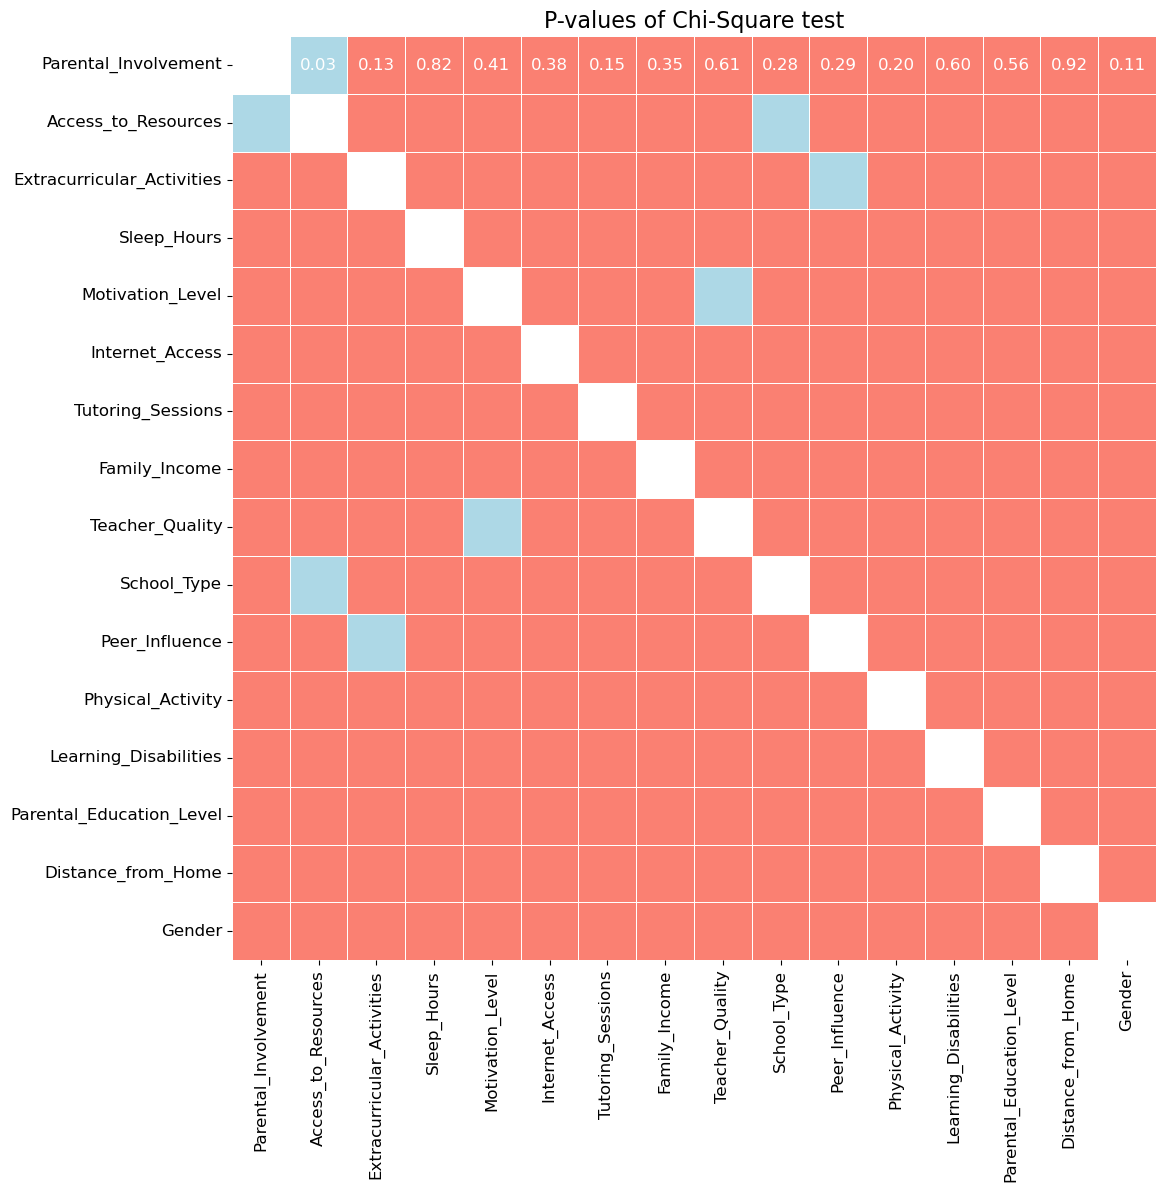

In [46]:
# Fonction pour calculer les p-valeurs de Chi2
def chi_square_test(data_cat):
    cols = data_cat.columns
    p_values = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                contingency_table = pd.crosstab(data_cat[col1], data_cat[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                p_values.loc[col1, col2] = p
            else:
                p_values.loc[col1, col2] = np.nan

    return p_values

# Calcul des p-valeurs
p_values = chi_square_test(data_cat)

# Heatmap améliorée
plt.figure(figsize=(16, 12))
sns.heatmap(p_values, annot=True, fmt=".2f", cbar=False, square=True,
            annot_kws={"size": 12, "color": "white"},
            mask=p_values.isnull(), linewidths=0.5,
            cmap=sns.color_palette(['lightblue', 'salmon']),
            vmin=0, vmax=0.1)  # Limitez les p-valeurs pour éviter toute confusion

plt.title('P-values of Chi-Square test', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


On the heatmap representing the results of the Chi-square test, we can see that we have some other correlations than the ones with the Exam_Score. 
We observe correlations between :
- Peer_Influence and Extracurricular_Activities
- School_Type and Access_to_Ressources
- Teacher_Quality and Motivation_Level
- Access_to_Resources and Parental_Involvement

The **Cramers' V test** is another way to show some strong associations between categorical variables. We use this second test to commplete the Chi-square statistical test.  
We will evaluate the Cramer's V test with a heatmap. The score can go from 0 to 1, where **0 is a weak association**, and **1 is a strong association**.

C:\Users\aguib\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


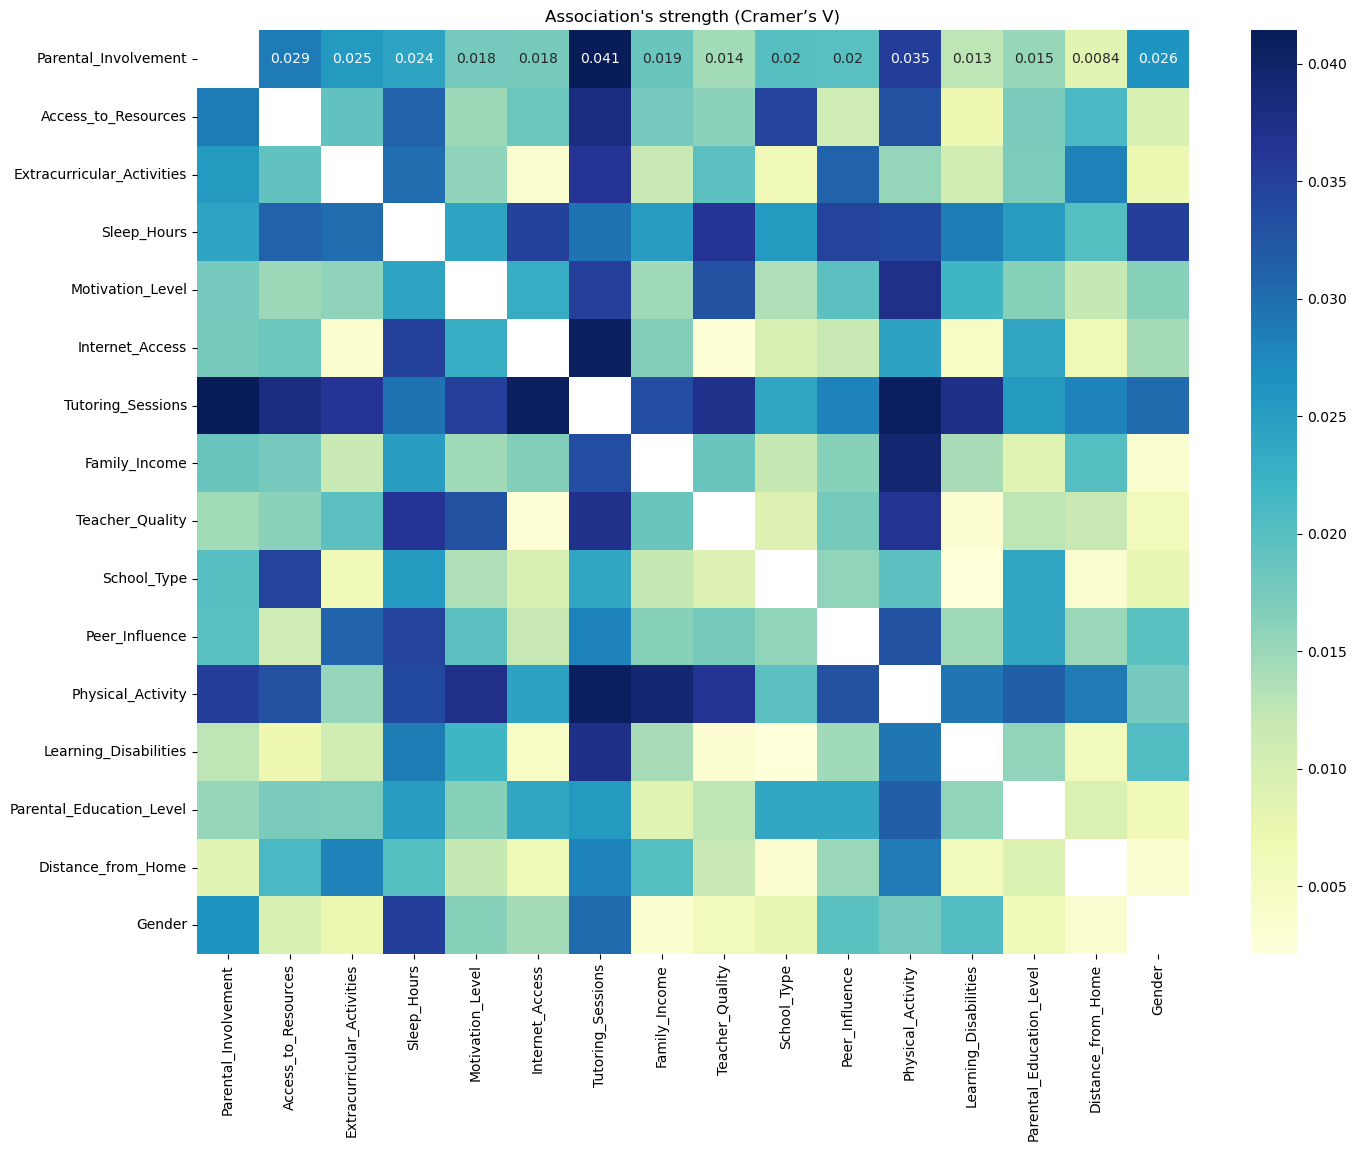

In [49]:
# Calculate the strength of the associations (Cramer's V)
def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

def cramers_v_matrix(data):
    cols = data.columns
    cramers_v_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                contingency_table = pd.crosstab(data[col1], data[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                cramers_v_matrix.loc[col1, col2] = cramers_v(chi2, contingency_table.sum().sum(), contingency_table.shape[0], contingency_table.shape[1])
            else:
                cramers_v_matrix.loc[col1, col2] = np.nan

    return cramers_v_matrix

# Cramer's V Compute
cramers_v_data = cramers_v_matrix(data_cat)

# Heatmap of Cramer's V
plt.figure(figsize=(16, 12))
sns.heatmap(cramers_v_data, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Association's strength (Cramer’s V)")
plt.show()

Here we see that the Cramer's V values don't go upper than 0.041, which shows that none of the variables have a strong association with another one.

**Conclusions**:
If the Chi-Square test show some correlations between variables, it is not the case with the Cramer's V test. It means that some of the relationships are statistically significant, but the effect of these relationships is very weak. The results of the Chi-Square test could also be caused by the large size of the dataset. With a big dataset, even some weak association can seam satistically significant.  

We can assume for the rest of the study, that our dataset **does not show any relevant correlation** between variables other than the Exam_Score.

### Label encoding

Before starting the modeling step, we need to convert our categorical data into numerical data. Indeed, the models we are using in the next steps - OLS, Ridge, Lasso and RandomForest - work with **numerical values**.

We chose to use LabelEncoder, which assigns a unique number to each categorical value. Even if we have two nominal variables (School_Type and Gender), we chose to use it and not to use OneHotEncoder because:

- We only have two nominal variables and EDA has shown that they have no significant linear relationship with the exam score.
- **Random Forest** handles Label-encoded variables natively. For **OLS, Ridge and Lasso**, the influence of nominal variables is small, which limits the impact of the artificial order introduced by LabelEncoder.



In [53]:
categorical_columns = data.select_dtypes(include = ['category']).columns

# We use 'LabelEncoder' to transform the categorical variables into numerical values
le = LabelEncoder()
for col in categorical_columns: 
    data[col] = le.fit_transform(data[col])

# high = 0, low = 1, medium = 2 
data.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,2,3,0,2,2,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2,0,1,2,0,1,1,1,67
7,25,78,1,0,1,6,50,2,1,1,0,0,1,0,2,0,1,0,1,66
8,17,94,2,0,0,6,80,0,1,0,2,1,0,1,1,0,0,2,1,69
9,23,98,2,2,1,8,71,2,1,0,0,0,1,2,5,0,1,1,1,72


## Modeling

Now we can start making our models!

We’ll start by using **Ordinary Least Squares (OLS) regression** to explore how different factors influence exam scores.

### Ordinary Least Squares (OLS) Method

**OLS** is a statistical method used to estimate the relationship between a target variable and explanatory variables. It works by **minimizing the sum of the squared differences between the observed values and the predicted values**. The OLS method will give us the **coefficients for each feature**, telling us how much each one influences the exam score.

In [57]:
# Separate the target y from the predictors X
y_linear = data['Exam_Score']
X_linear = data.drop(columns=['Exam_Score'])

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_linear)

# Convert the scaled predictors back to a DataFrame to retain column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X_linear.columns, index=X_linear.index)

# Add a constant (intercept) to allow estimation of the y-intercept
X_with_intercept = sm.add_constant(X_scaled_df)

# Create and fit the OLS model
model_all = sm.OLS(y_linear, X_with_intercept).fit()

# Print the model summary
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     612.2
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:09:32   Log-Likelihood:                -14436.
No. Observations:                6378   AIC:                         2.891e+04
Df Residuals:                    6358   BIC:                         2.905e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         67.2521      0.029   2304.654      0.000      67.195      67.309
Hours_Studied                  1.7458      0.029     59.759      0.000       1.689       1.803
Attendance                     2.2824      0.029     78.081      0.000       2.225       2.340
Parental_Involvement          -0.3725      0.029    -12.750      0.000      -0.430      -0.315
Access_to_Resources           -0.3510      0.029    -12.006      0.000      -0.408      -0.294
Extracurricular_Activities     0.2670      0.029      9.144      0.000       0.210       0.324
Sleep_Hours                   -0.0152      0.029     -0.519      0.604      -0.072       0.042
Previous_Scores                0.6908      0.029     23.628      0.000       0.633       0.748
Motivation_Level              -0.1216      0.029     -4.162      0.000      -0.179      -0.064
Internet_Access                0.2494      0.029      8.539      0.000       0.192       0.307
Tutoring_Sessions              0.6079      0.029     20.817      0.000       0.551       0.665
Family_Income                 -0.1162      0.029     -3.977      0.000      -0.174      -0.059
Teacher_Quality               -0.2080      0.029     -7.123      0.000      -0.265      -0.151
School_Type                   -0.0009      0.029     -0.032      0.974      -0.058       0.056
Peer_Influence                 0.4044      0.029     13.843      0.000       0.347       0.462
Physical_Activity              0.1702      0.029      5.818      0.000       0.113       0.228
Learning_Disabilities         -0.2656      0.029     -9.091      0.000      -0.323      -0.208
Parental_Education_Level       0.1130      0.029      3.867      0.000       0.056       0.170
Distance_from_Home             0.3297      0.029     11.286      0.000       0.272       0.387
Gender                        -0.0167      0.029     -0.573      0.567      -0.074       0.041
==============================================================================
Omnibus:                     8761.989   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2036474.981
Skew:                           8.027   Prob(JB):                         0.00
Kurtosis:                      89.054   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### OLS Regression Results:

The output of the OLS regression provides a summary of how each feature relates to the exam score. Some key statistics from the regression output include:

##### R-squared: 0.647
R² Score indicates how well the model explains the **variance** in the target variable. So, here, it means that our model **explains 64.7% of the variation in exam scores**.

##### Adjusted R-squared: 0.646
This value adjusts the R-squared to account for the number of predictors in the model. The slight difference from the R-squared value suggests that the number of predictors is not inflating the model's explanatory power too much.

##### F-statistic: 612.2
The F-statistic is very high, and its associated p-value (0.00) indicates that the overall model is statistically significant. This means that at least one of the predictors is significantly related to the exam score.

##### Coefficients and p-values:
For each feature, the model provides a coefficient and a p-value. Features with a p-value less than 0.05 are considered statistically significant - in our case it's almost every feature except Sleep_Hours, School_Type and Gender.

### Visualizing the coefficients

Now, we would like to use a plot to visualize the influence of each feature on the exam score.

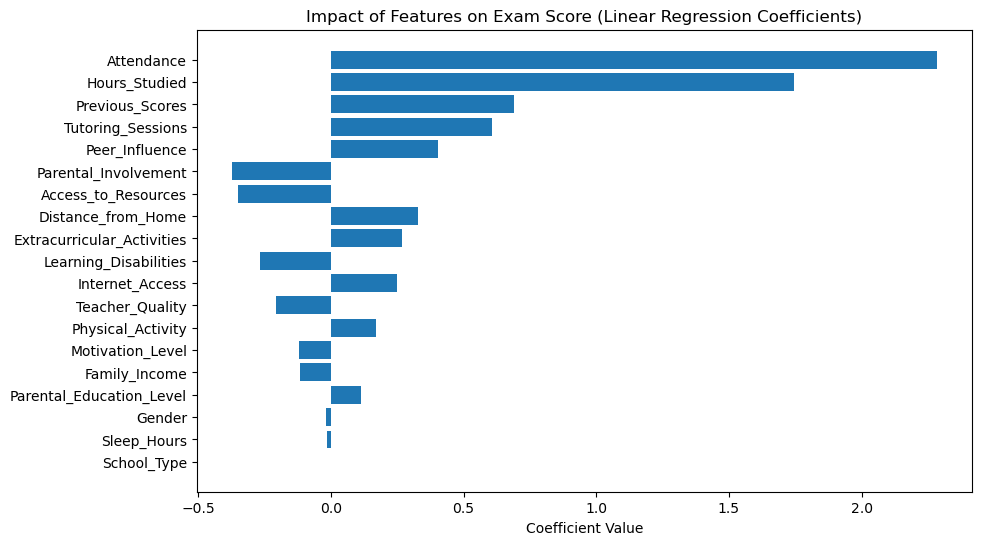

In [60]:
coefficients_linear = model_all.params
coefficients_linear = coefficients_linear.drop('const')

coeff_df = pd.DataFrame({
    'Feature': coefficients_linear.index,
    'Coefficient': coefficients_linear.values
})

#Sorting
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=True).index)

#Creating the plot
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Impact of Features on Exam Score (Linear Regression Coefficients)")
plt.show()

### Key Inferences:

##### Attendance:
Coefficient: 2.28 - Regular attendance has the strongest positive impact on exam scores.

##### Hours_Studied:
Coefficient: 1.75 - Students who study more hours tend to score higher on exams.

##### Parental_Involvement:
Coefficient: -0.37 - Surprisingly, higher parental involvement correlates negatively with exam scores. 

##### Access_to_Resources:
Coefficient: -0.35 - Suggests that too many resources might not always improve performance.



### Shrinkage Methods - Ridge and Lasso

We just saw how to use the OLS model to have a first idea of which factors influence the most the final exam score of a student. We will now use two shrinkage methods, **Ridge** and **Lasso**, to confirm our inference observations. 

Multiple Linear Regression methods like OLS present some risks of overfitting and can be unstable if the model presents some multicolinearity. 
Shrinkage methods, such as Ridge and Lasso, address these issues by adding a **penalty term** that helps to **reduce overfitting** and provides a **more reliable selection of relevant variables**.

#### Ridge Method

Ridge is a shrinkage method using the **L2 norm** to shrink the coefficients. This way, the L2 norm **reduces the impact of multicolinearity**. Shrinking the coefficients also have an impact on their stability : it limits their amplitude. It hence helps **reducing the overfitting's risk**.  
We saw earlier with Chi-Square and Cramer's V that our dataset does not contain much colinearity. We will try to confirm this information by comparing the results of Ridge to those of the Linear Regression and of Lasso and Random Forest later. 

The **alpha parameter** is very important to have a good evalution model.
Below, we are testing different alpha values using **GridSearchCV**, to find the best one. This method helps us tuning the model correctly by using cross validation for all given alpha values.

In [67]:
# Define the features and the target (Exam_Score)
X_ridge = data.drop(columns=['Exam_Score'])   
y_ridge = data['Exam_Score']

# Separate Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Best alpha for Ridge
ridge_model = Ridge()
ridge_cv = GridSearchCV(ridge_model, param_grid, cv=7, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print(f"Best alpha for Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Best CV MSE for Ridge: {-ridge_cv.best_score_:.4f}")

Best alpha for Ridge: 10
Best CV MSE for Ridge: 5.5198


The GridSearchCV shows that the best value for the Ridge **hyperparameter alpha is 10**.  
Now we will **apply the Ridge model** to our dataset with an alpha value of **10**.

                       Feature  Coefficient
8              Internet_Access     0.883893
15       Learning_Disabilities    -0.844111
4   Extracurricular_Activities     0.536613
13              Peer_Influence     0.513352
9            Tutoring_Sessions     0.480921
17          Distance_from_Home     0.478211
2         Parental_Involvement    -0.406183
3          Access_to_Resources    -0.402088
0                Hours_Studied     0.292548
11             Teacher_Quality    -0.259166
1                   Attendance     0.197603
14           Physical_Activity     0.180043
7             Motivation_Level    -0.177932
16    Parental_Education_Level     0.169228
10               Family_Income    -0.161275
6              Previous_Scores     0.047330
5                  Sleep_Hours    -0.023312
18                      Gender    -0.019939
12                 School_Type     0.008507


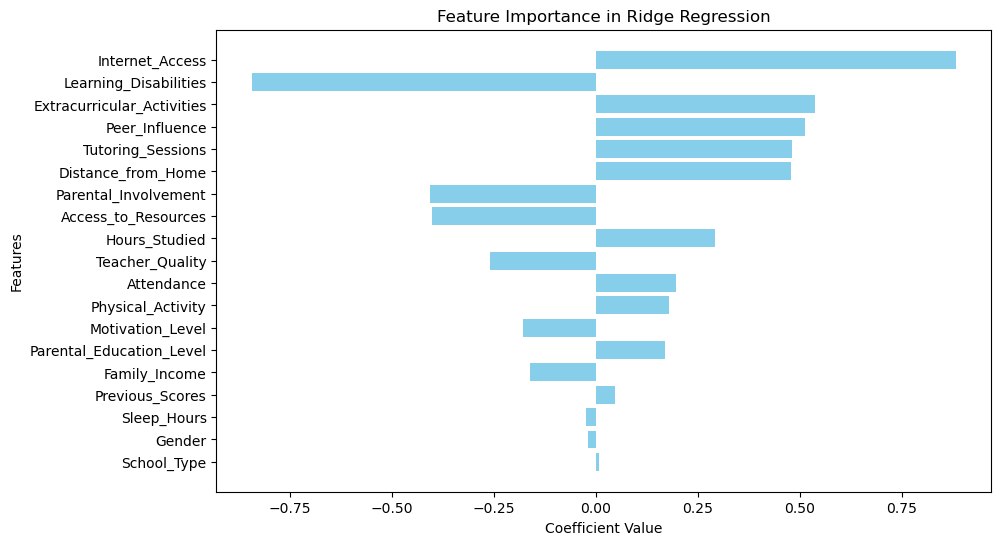

In [69]:
# Create the Ridge Model
ridge_model = Ridge(alpha=10)

# Train the Model
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

coefficients_ridge = ridge_model.coef_

coeff_data = pd.DataFrame({
    'Feature': X_ridge.columns,  
    'Coefficient': coefficients_ridge
})

coeff_data['Absolute_Coefficient'] = coeff_data['Coefficient'].abs()
coeff_data = coeff_data.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the results
print(coeff_data[['Feature', 'Coefficient']])

# Coefficients Visualization 
plt.figure(figsize=(10, 6))
plt.barh(coeff_data['Feature'], coeff_data['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Ridge Regression')
plt.gca().invert_yaxis()
plt.show()

In [70]:
# Evaluate performances through Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error (MSE): 5.216237376034183
Coefficient of Determination (R^2): 0.6643202082197928


The Mean Squared Error (MSE) measures the average squared difference between predicted and actual values.

Regarding the MSE error and the R² score, we can say that **the error of the model is acceptable**. However, the results showed by the Ridge model are **really different** from the ones of the Multiple Linear Regression. The reason may be that Ridge is trying to reduce some multicolinearity that does not really exist in our dataset. This way, the algorithm may **increase some really weak signals** that are not significant in reality. It explains the big difference we can observe in the results.  
This shows that **Ridge is probably not the best Machine Learning algorithm to use in this situation**.  

#### Lasso Method

The **Lasso Method** is a shrinkage method like Ridge, but it uses **the norm L1** to shrink the coefficient. The use of this norm allows Lasso to **select some variables and put to zero the ones** that don't have any important impact on the Exam_Score.  
Compared to Ridge, the Lasso method does not try to reduce the impact of multicolinearity, it will only select the variables that have the most impact on the Exam_Score.  
In the context of our inference question, the results given by Lasso should be interesting.

In [74]:
# Define the target and the predictors
X_lasso = data.drop(columns=['Exam_Score']) 
y_lasso = data['Exam_Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We test different values of the alpha parameter to find the best one using **GridSearchCV**, the same way we did for Ridge. 

In [76]:
# Define hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Best alpha for Lasso
lasso_model = Lasso()
lasso_cv = GridSearchCV(lasso_model, param_grid, cv=7, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print(f"Best alpha for Lasso: {lasso_cv.best_params_['alpha']}")
print(f"Best CV MSE for Lasso: {-lasso_cv.best_score_:.4f}")

Best alpha for Lasso: 0.01
Best CV MSE for Lasso: 5.5183


According to the results of the GridSearchCV, we will chose **a value of 0.01** to train the dataset with the lasso algorithm.

                       Feature  Coefficient
0                Hours_Studied     1.745855
1                   Attendance     2.273285
2         Parental_Involvement    -0.341660
3          Access_to_Resources    -0.341391
4   Extracurricular_Activities     0.255080
5                  Sleep_Hours    -0.024476
6              Previous_Scores     0.672689
7             Motivation_Level    -0.128709
8              Internet_Access     0.228283
9            Tutoring_Sessions     0.583715
10               Family_Income    -0.110370
11             Teacher_Quality    -0.223888
13              Peer_Influence     0.379774
14           Physical_Activity     0.174914
15       Learning_Disabilities    -0.254234
16    Parental_Education_Level     0.109642
17          Distance_from_Home     0.311663


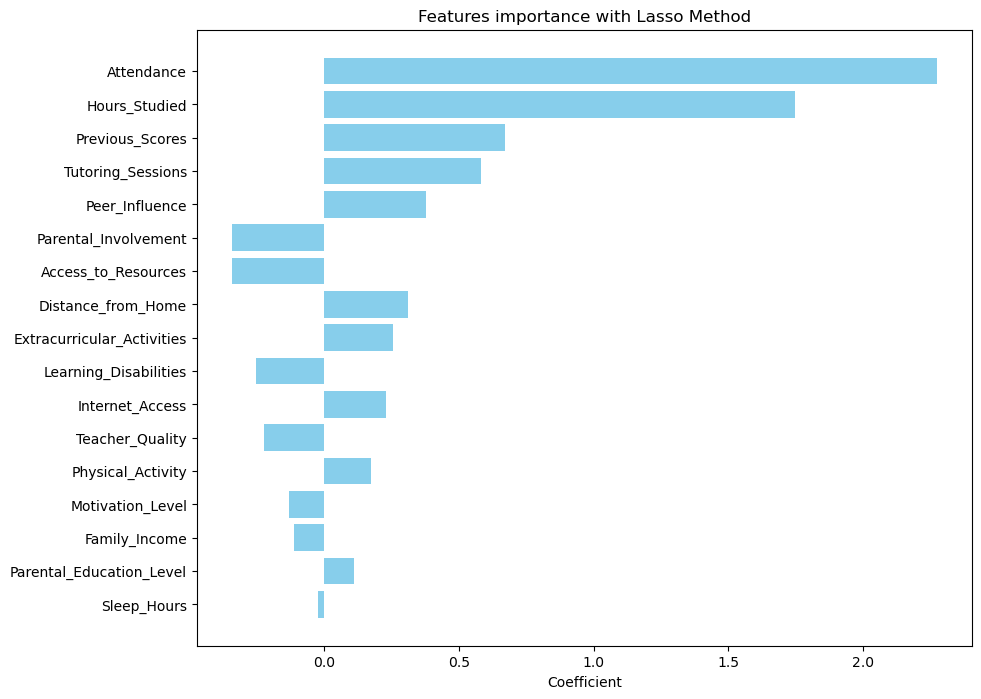

In [78]:
# Initialize lasso with alpha value
lasso = Lasso(alpha=0.01)

# train
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

lasso_coefficients = pd.DataFrame({
    'Feature': X_lasso.columns,
    'Coefficient': lasso.coef_
})

# Keeping only the variables with a non-zero coefficient
lasso_coefficients = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]
print(lasso_coefficients)

lasso_coefficients_sorted = lasso_coefficients.reindex(
    lasso_coefficients['Coefficient'].abs().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 8))
plt.barh(lasso_coefficients_sorted['Feature'], lasso_coefficients_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title("Features importance with Lasso Method")
plt.gca().invert_yaxis() 
plt.show()

In [79]:
# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Show R² score
r2_score = lasso.score(X_test, y_test)
print("R^2 Score:", r2_score)


Mean Squared Error: 5.215963046846375
R^2 Score: 0.6643378620875146


The results of the Lasso Method are similar to the results of the Multiple Linear Regression. The Mean Squared Error and the R² Score evaluating Lasso performance are in the same range than those evaluating Ridge. We can say that a MSE of 5,21 and a R² Score of 0.66 are acceptable and that **the results are reliable**. 

We can then deduce several things from the results we have now :
- Lasso **shrinked toward zero only 2 variables : Shool Type and Gender**. All the other have an importance, even small, on the prediction of the Exam_Score.
- **Lasso is highly similar to Linear Regression**, but **very different from Ridge**. It indicates the lack of multicolinearity of our dataset and proves that using Lasso and MLR to produce some inference conclusions is a good choice. Lasso and MLR are **ignoring some very small multicolinearity signals that Ridge is amplifying**.

### Random Forest method

Our primary objective was to understand the relationships between features and the target variable. 

**Linear Regression**, **Ridge regression** and **Lasso Regression** were looking for **linear relationships**.

To enhance our ability to infer relationships, we introduce **Random Forest Regressor**, a supervised learning algorithm that builds multiple **decision trees** on random subsets of data and makes predictions by averaging (in the case of regression) the results of all the trees to improve accuracy and reduce the risk of overfitting.

Random Forest models **non-linear dependencies** and complex interactions between features and the target variable, providing deeper insights into the data's structure.

It also inherently calculates **feature importance**, ranking variables based on their contribution to the model. This helps identify the most influential predictors.

We use **GridSearchCV** to tune the hyperparameters of the **Random Forest Regressor** model and improve its performance. We test different combinations of parameters, such as the **number of trees** (n_estimators) and the **depth of trees** (max_depth), to find the optimal configuration.

After optimization, the model is evaluated on a test set with metrics such as **MSE** (Mean Squared Error) and **R²** to evaluate its final performance.

This allows us to obtain a better performing and better fitting model.

In [84]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the target and predictors
X_rf = data.drop(columns=['Exam_Score'])
y_rf = data['Exam_Score']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Create a Random Forest model
rf = RandomForestRegressor(random_state=42)

# Optimize hyperparameters with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples in a leaf
    'max_features': [1.0, 'sqrt', 'log2'],  # Number of features to consider for splitting at each node
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available CPU cores
    verbose=2,          # Log the process details
    scoring='r2'        # Optimize for R² score
)

# Train the model with GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and optimized model
print("\nBest Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the optimized model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits

Best Parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 5.577501168309018
R2 Score: 0.6410718500975741


The MSE and the R2 score are a little less good than those of the Ridge or Lasso methods but still acceptable.

Now, let's look at the **feature importance**, that helps us understand which variables have the most significant impact on predictions.

- We extract the feature_importances_ attribute from the model.
- The results are sorted and visualized for better interpretability.

                       Feature  Importance
1                   Attendance    0.415489
0                Hours_Studied    0.263000
6              Previous_Scores    0.083732
9            Tutoring_Sessions    0.033646
3          Access_to_Resources    0.028885
2         Parental_Involvement    0.025521
5                  Sleep_Hours    0.021174
14           Physical_Activity    0.020082
10               Family_Income    0.019295
13              Peer_Influence    0.013993
17          Distance_from_Home    0.012820
16    Parental_Education_Level    0.012187
11             Teacher_Quality    0.011337
7             Motivation_Level    0.010939
15       Learning_Disabilities    0.007394
4   Extracurricular_Activities    0.006284
18                      Gender    0.005835
8              Internet_Access    0.004236
12                 School_Type    0.004154


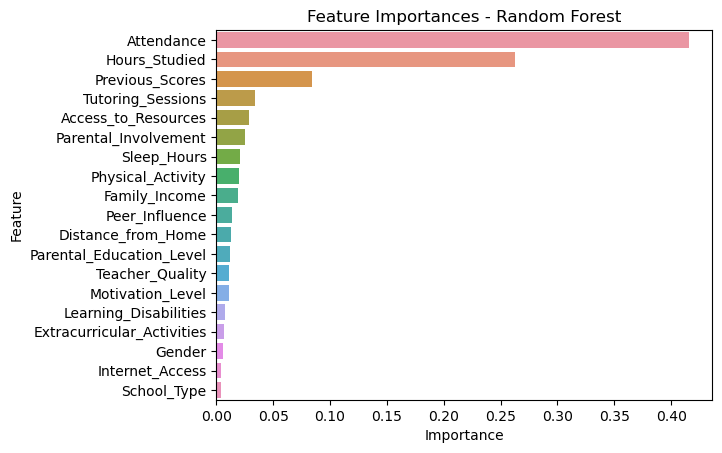

In [87]:
# Analyze feature importance 
feature_importances = pd.DataFrame({'Feature': X_rf.columns, 'Importance': best_rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances - Random Forest')
plt.show()

Here we can see that the two features that have the biggest importance are **Attendance** and **Hours studied**.

## Conclusion

In [91]:
scaler = StandardScaler()

# Standardize the coefficients for each method 
combined_df['Standardized_Coefficient'] = (
    combined_df.groupby('Method')['Absolute_Coefficient']
    .transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())
)

plt.figure(figsize=(16, 10))
sns.barplot(
    data=combined_df,
    x='Standardized_Coefficient', y='Feature', hue='Method', palette='Set2'
)
plt.title('Feature Importance (Standardized Across Methods)')
plt.xlabel('Standardized Importance')
plt.ylabel('Features')
plt.legend(title='Method')
plt.show()


NameError: name 'combined_df' is not defined